# 1. Pre-requisite
---



## Importing the Dependencies

---



In [9]:
!pip install seaborn


In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import StratifiedKFold

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(7)

In [13]:
# Deprecated
# tf.logging.set_verbosity(tf.logging.INFO)

# Use the compatible version
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

## Data Collection and Analysis

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
# Using diabetes.csv
raw_df = pd.read_csv('diabetes-dataset.csv')

In [16]:
# pd.read_csv?

In [17]:
# printing the first 5 rows of the dataset
raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [18]:
raw_df.shape

(2000, 9)

In [19]:
raw_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [20]:
raw_df['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [21]:
raw_df.describe

<bound method NDFrame.describe of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                 

In [22]:
raw_df.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Pregnancies,2.000,0.000,0.00,0.000,1.000,0.000,4.000,8.000,2.000,2.000,...,3.000,6.00,6.000,2.000,1.000,2.00,8.000,6.000,0.000,2.000
Glucose,138.000,84.000,145.00,135.000,139.000,173.000,99.000,194.000,83.000,89.000,...,111.000,102.00,134.000,87.000,79.000,75.00,179.000,85.000,129.000,81.000
BloodPressure,62.000,82.000,0.00,68.000,62.000,78.000,72.000,80.000,65.000,90.000,...,90.000,82.00,70.000,0.000,60.000,64.00,72.000,78.000,110.000,72.000
SkinThickness,35.000,31.000,0.00,42.000,41.000,32.000,17.000,0.000,28.000,30.000,...,12.000,0.00,23.000,23.000,42.000,24.00,42.000,0.000,46.000,15.000
Insulin,0.000,125.000,0.00,250.000,480.000,265.000,0.000,0.000,66.000,0.000,...,78.000,0.00,130.000,0.000,48.000,55.00,130.000,0.000,130.000,76.000
BMI,33.600,38.200,44.20,42.300,40.700,46.500,25.600,26.100,36.800,33.500,...,28.400,30.80,35.400,28.900,43.500,29.70,32.700,31.200,67.100,30.100
DiabetesPedigreeFunction,0.127,0.233,0.63,0.365,0.536,1.159,0.294,0.551,0.629,0.292,...,0.495,0.18,0.542,0.773,0.678,0.37,0.719,0.382,0.319,0.547
Age,47.000,23.000,31.00,24.000,21.000,58.000,28.000,67.000,24.000,42.000,...,29.000,36.00,29.000,25.000,23.000,33.00,36.000,42.000,26.000,25.000
Outcome,1.000,0.000,1.00,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.00,1.000,0.000,0.000,0.00,1.000,0.000,1.000,0.000


In [23]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [24]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [25]:
raw_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
raw_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


### This shows that there are:
- rows where `Glucose` is 0
- rows where `BloodPressure` is 0
- rows where `SkinThickness` is 0
- rows where `Insulin` is 0
- rows where `BMI` is 0
which is not possible.\
Lets impute those rows with there column mean.

In [27]:
# First lets check how many 0 values are in these columns
featureList = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
raw_df[featureList].isin([0]).sum()

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64

### for `Glucose`, `BloodPressure`, `SkinThickness` and `BMI`
due to low number of '0' values we can impute it with their mean.\
But we will have to check it imputing in `Insulin` will affect accuracy
beacuse there are around ~50% data that is '0'.

In [28]:
# For Glucose
raw_df["Glucose"] = raw_df["Glucose"].replace({ 0 : raw_df["Glucose"].mean()})

# For BloodPressure
raw_df["BloodPressure"] = raw_df["BloodPressure"].replace({ 0 : raw_df["BloodPressure"].mean()})

# For SkinThickness
raw_df["SkinThickness"] = raw_df["SkinThickness"].replace({ 0 : raw_df["SkinThickness"].mean()})

# For BMI
raw_df["BMI"] = raw_df["BMI"].replace({ 0 : raw_df["BMI"].mean()})

# Lets checkif it worked
raw_df[featureList].isin([0]).sum()

Glucose            0
BloodPressure      0
SkinThickness      0
Insulin          956
BMI                0
dtype: int64

Because there are 956/2000 rows of `Insulin` where data is '0'
we will train 2 models where we drop `Insulin` and where we impute it.

In [29]:
raw_df_idroped = raw_df.drop(raw_df[raw_df["Insulin"] == 0].index, axis=0)
raw_df_idroped.shape

(1044, 9)

#### distributions of each feature

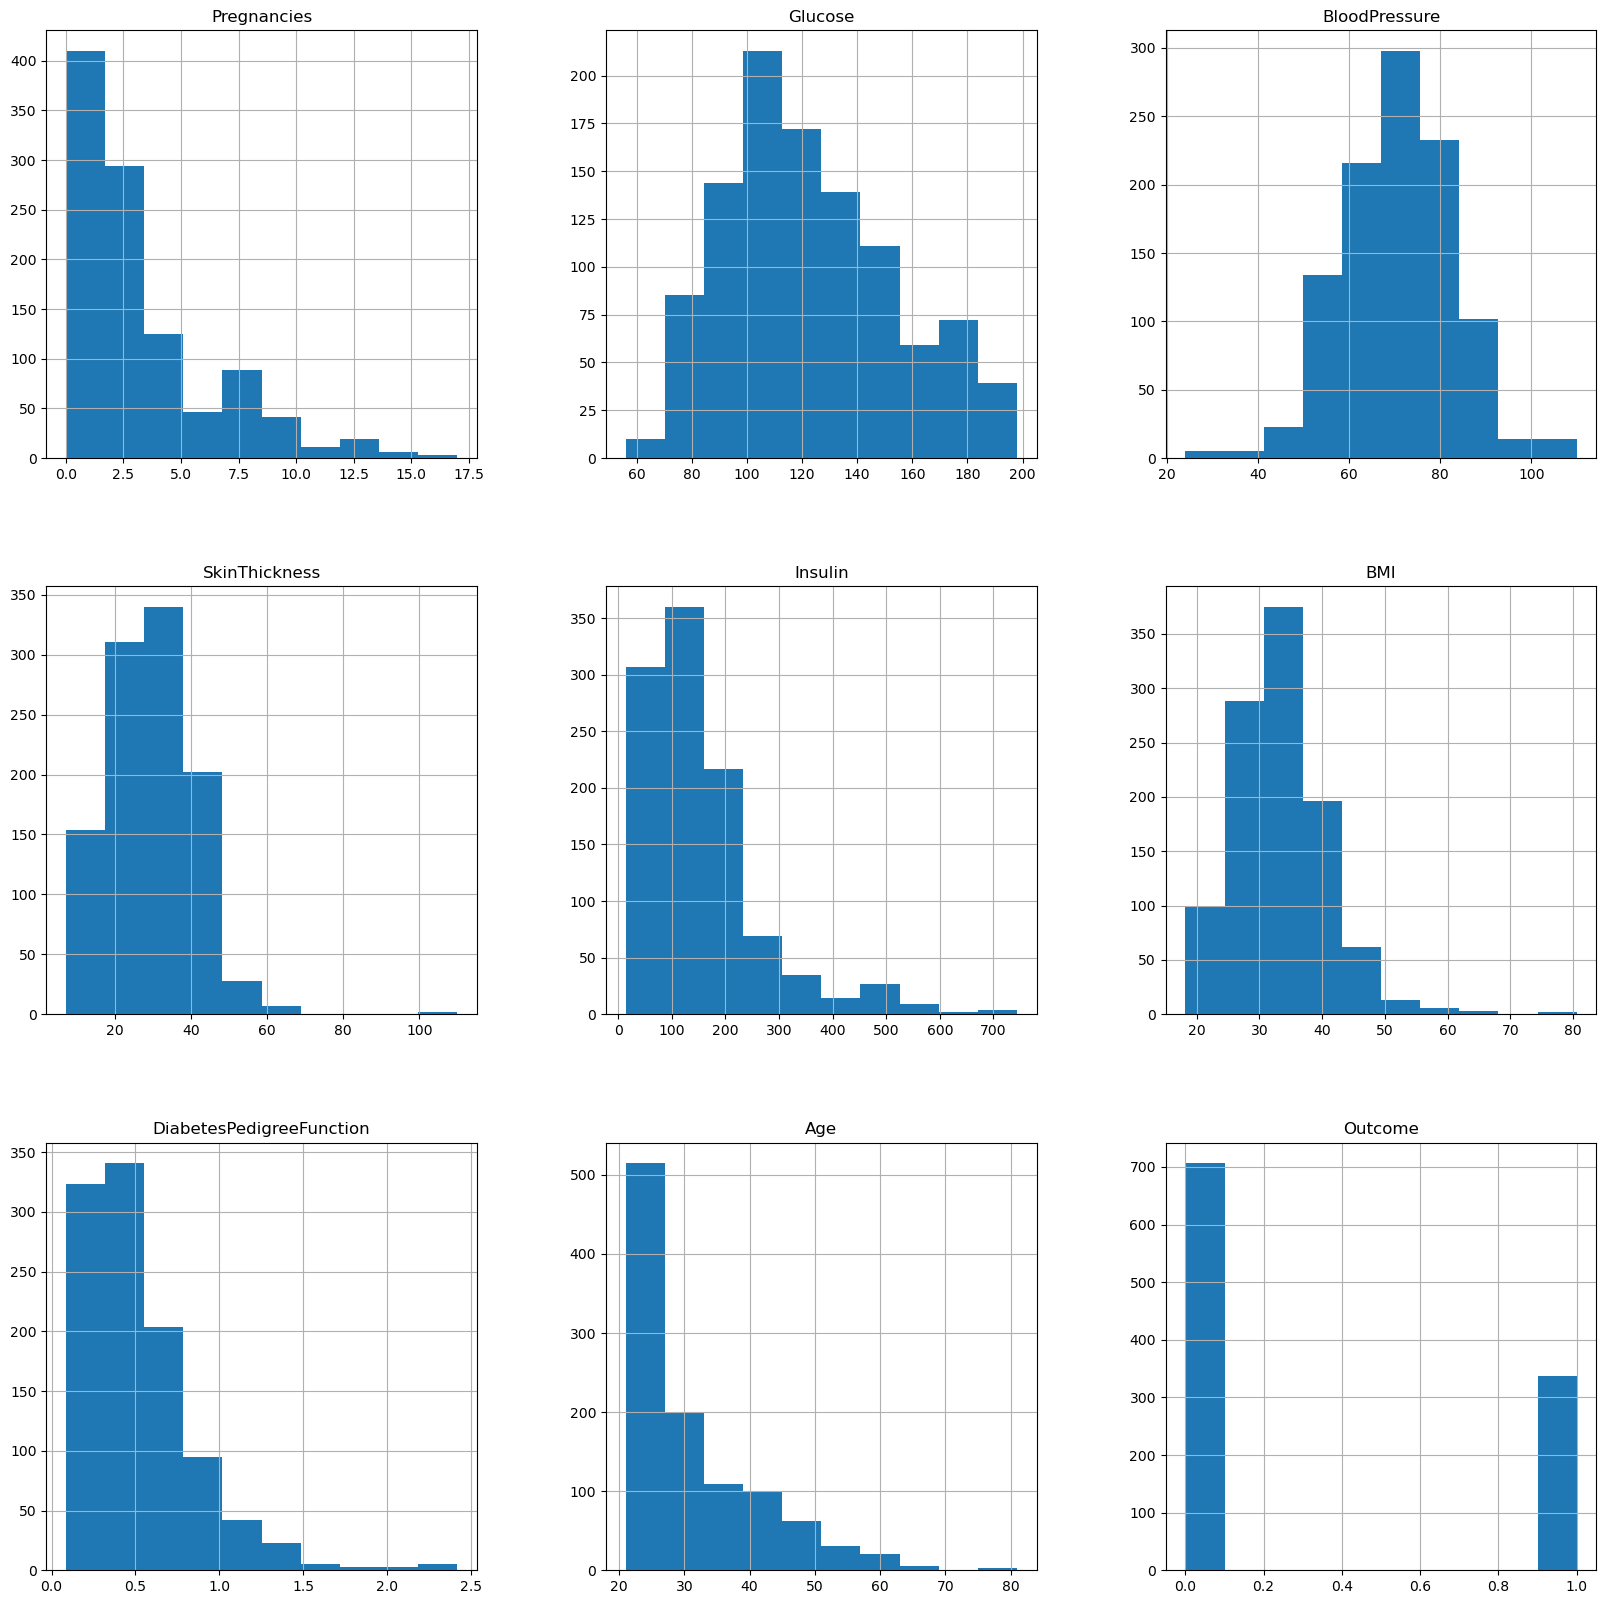

In [30]:
raw_df_idroped.hist(figsize=(20,20))
plt.show()

## Check the proportion of the class from each feature

### Baseline (Zero-R)


In [31]:
print('- Total Instatnces')
print(len(raw_df_idroped.Outcome), end='\n\n')
print('- Values and Counts of the Class')
print(raw_df_idroped.Outcome.value_counts(), end='\n\n')
print('- Zero R of the Dataset')
print(raw_df_idroped.Outcome.value_counts().max()/len(raw_df_idroped.Outcome))

- Total Instatnces
1044

- Values and Counts of the Class
Outcome
0    707
1    337
Name: count, dtype: int64

- Zero R of the Dataset
0.6772030651340997


# 2. Naive Models and Results

- Only changes of iteration, rest are default
- Used Models are below.
1. SVM
2. Logistic Regression
3. Random Forest
4. Decision Tree
5. KNN
6. Naive Bayes(Gaussian)
7. MLP
8. AdaBoost

## Separate target and variables

In [32]:
X_df = raw_df.drop(columns=['Outcome'])
y_df = raw_df['Outcome']

## Stratified cross validation
### Train_Test---------Fold: 5
### Train-Validation---Fold: 10 (10% for validation)

In [33]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [34]:
def skfCV(X, y, model, n_splits_outer=5, n_splits_inner=10):
    best_scores = []

    # Outer Stratified K-Fold (1-fold for testing, remaining for training)
    outer_fold = StratifiedKFold(n_splits=n_splits_outer, shuffle=True)

    outer_scores = []

    for i, (train_index_outer, test_index_outer) in enumerate(outer_fold.split(X, y), start=1):
        X_train_outer, X_test_outer = X.iloc[train_index_outer, :], X.iloc[test_index_outer, :]
        y_train_outer, y_test_outer = y.iloc[train_index_outer], y.iloc[test_index_outer]

        inner_scores = []

        # Inner Stratified K-Fold (with 10% validation)
        inner_fold = StratifiedKFold(n_splits=n_splits_inner, shuffle=True)

        for j, (train_index_inner, val_index) in enumerate(inner_fold.split(X_train_outer, y_train_outer), start=1):
            X_train_inner, X_val = X_train_outer.iloc[train_index_inner, :], X_train_outer.iloc[val_index, :]
            y_train_inner, y_val = y_train_outer.iloc[train_index_inner], y_train_outer.iloc[val_index]

            # Normalize input features
            scaler = StandardScaler()
            X_train_inner_scaled = scaler.fit_transform(X_train_inner)
            X_val_scaled = scaler.transform(X_val)

            # Fit the model
            model.fit(X_train_inner_scaled, y_train_inner, epochs=150, batch_size=10, verbose=0)

            # Predict on the validation set
            y_pred_val = model.predict(X_val_scaled)
            y_pred_val = (y_pred_val > 0.5).astype(int)

            # Calculate accuracy and F1 score for each fold
            acc_fold = accuracy_score(y_val, y_pred_val)
            f1_fold = f1_score(y_val, y_pred_val)

            # Print or store accuracy and F1 score for each fold
            print(f'Fold {j}: Accuracy: {acc_fold:.4f}, F1 Score: {f1_fold:.4f}')

            inner_scores.append((acc_fold, f1_fold))

        # After the inner loop, calculate the mean accuracy and F1 score
        mean_acc_inner = np.mean([score[0] for score in inner_scores])
        mean_f1_inner = np.mean([score[1] for score in inner_scores])

        # Test on the outer test set
        X_test_outer_scaled = scaler.transform(X_test_outer)
        y_pred_test = model.predict(X_test_outer_scaled)
        y_pred_test = (y_pred_test > 0.5).astype(int)

        acc_test = accuracy_score(y_test_outer, y_pred_test)
        f1_test = f1_score(y_test_outer, y_pred_test)

        # Store the outer and inner scores for analysis
        outer_scores.append((acc_test, mean_acc_inner, f1_test, mean_f1_inner))

        # Print or store accuracy, mean accuracy, and F1 score for the outer fold
        print(f'\nTest Fold {i}: Test Accuracy: {acc_test:.4f}, Mean(train_validation) Accuracy: {mean_acc_inner:.4f}, Test F1 Score: {f1_test:.4f}, Mean(train_validation) F1 Score: {mean_f1_inner:.4f}\n')

    # After the outer loop, calculate the mean test accuracy and F1 score
    mean_acc_outer = np.mean([score[0] for score in outer_scores])
    mean_f1_outer = np.mean([score[2] for score in outer_scores])

    best_scores.append((mean_acc_outer, mean_f1_outer))

    print(f'Mean Test Accuracy: {mean_acc_outer:.4f}, Mean Test F1 Score: {mean_f1_outer:.4f}\n')

    return best_scores

In [35]:
# Assuming X_df has 8 features
model = create_model(input_dim=X_df.shape[1])

In [36]:
model_all = skfCV(X_df, y_df, model)



5/5 [==============================] - 0s 4ms/step
Fold 1: Accuracy: 0.7937, F1 Score: 0.6857
5/5 [==============================] - 1s 4ms/step
Fold 2: Accuracy: 0.8313, F1 Score: 0.7731
5/5 [==============================] - 0s 7ms/step
Fold 3: Accuracy: 0.8562, F1 Score: 0.7677
5/5 [==============================] - 0s 5ms/step
Fold 4: Accuracy: 0.8375, F1 Score: 0.7547
5/5 [==============================] - 0s 6ms/step
Fold 5: Accuracy: 0.9250, F1 Score: 0.8947
5/5 [==============================] - 0s 3ms/step
Fold 6: Accuracy: 0.8812, F1 Score: 0.8319
5/5 [==============================] - 0s 4ms/step
Fold 7: Accuracy: 0.9125, F1 Score: 0.8727
5/5 [==============================] - 0s 5ms/step
Fold 8: Accuracy: 0.9250, F1 Score: 0.8929
5/5 [==============================] - 0s 4ms/step
Fold 9: Accuracy: 0.9187, F1 Score: 0.8785
5/5 [==============================] - 0s 4ms/step
Fold 10: Accuracy: 0.8812, F1 Score: 0.8319
13/13 [==============================] - 0s 3ms/step

Tes